<a href="https://colab.research.google.com/github/VidishaPonnappa/MachineLearning/blob/main/CapstoneProject_11a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 11: IoT Devices - Time Series Plots


---

### Goal of the Project:

This project is designed for you to practice and solve the activities that are based on the following concepts covered in classes 38 - 43:

 - The `datetime` module
 - Data Cleaning
 - Grouping and Aggregation
 - Customised `matplotlib` plots
 - Bivariate Bar Plots

---

### Context

The **Internet of things (IoT)** describes the network of physical objects that are embedded with sensors, software, and other technologies to connect and exchange data with other devices and systems over the **Internet**.

IoT devices have been around for quite a while now. They are used to collect data through different kinds of sensors such as **motion sensors**, **heat sensors**, **vibration sensors**, etc.

A lot of people are using smartwatches and fitness watches to track their daily physical activities, calories burnt, average resting heart rates, and sleep cycle so that they lead a fit life. Such wearables are equipped with laser sensors to collect data.

Heat Index (temperature + humidity) is one common data recorded on these IoT readers. The sensor reads hundreds to millions of data per second. There is a huge and versatile application of this data in real-world like agriculture, weather forecasting, soil monitoring and treatment, enterprise maintenance, and so on.

Heat stress index of India:

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/heat_index_india.png' width=600>


---

### Problem Statement

Put yourself in the shoes of a quality analyst whose task is to test the efficacy of new IoT devices. You need to create time-series plots for daily temperature variation for the given duration and find any inconsistencies in the temperature readings (if there are any).

In case the data collected through the device is correct, find the percentages of the yellow, orange, and red zones.

---

### Dataset Information

This dataset contains the temperature readings from an IoT device installed outside and inside of an anonymous room (labelled as admin room) to test the device. The readings were taken between 11 January 2018 and 10 December 2018. Additionally, it was uninstalled or taken down quite frequently during the entire reading period.

There are 5 columns and 97,605 rows in the dataset. The columns are as follows:

1. `id` - Unique IDs for each reading.

2. `room_id/id` - Room id in which device was installed (inside and/or outside). In this dataset, only `Room Admin` label is used as a `room_id` for example purpose.

3. `noted_date` - Date and time of reading.

4. `temp` - Temperature readings.

5. `out/in` - Whether the reading was taken from a device installed inside or outside of the room?

Here's the dataset link:

https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv

---

### Things To Do

- What is the trend in the variation in daily indoor and outdoor temperatures?

- What is the trend in the variation in monthly median indoor and outdoor temperatures?

- Find out the hottest and coldest month(s).

- Find the maximum and minimum temperatures recorded for each month.

---

## Specific Tasks to Achieve the Main Goal:

#### 1. Import Modules and Load Dataset

In [ ]:
# Import the required modules and load the dataset.
import pandas as pd
df=pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/iot-devices/IoT-device.csv')
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [ ]:
# Get the information of DataFrame using the 'info()' function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


---

#### 2. Missing Values Check

Check for the null values in the DataFrame.

In [ ]:
# The null values in DataFrame are checked using the 'isnull()' function.
df.isnull().sum()

id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

**Q:** Are there any columns in the DataFrame containing the missing values? If yes, then provide the column names.

**A:** No

---

#### 3. Drop Unnecessary Columns


Find out if there are unnecessary columns in the DataFrame. If there are any, then drop them from the DataFrame.

In [ ]:
# Drop the unnecessary columns from the DataFrame.


**Hint**: You can drop the columns using the `drop()` function.

---

#### 4. Get `datetime` Objects

Convert the values contained in the `noted_date` column into the `datetime` objects.

In [ ]:
# The values contained in the 'noted_date' column are coverted into the 'datetime' objects.
df['noted_date']=pd.to_datetime(df['noted_date'])

In [ ]:
# Verify whether the conversion is successful or not.
print(df['noted_date'].dtype)

datetime64[ns]


**Hint**:

 - You can convert the values into `datetime` objects using the `to_datetime()` function of the `pandas` module.

 - You can verify the same using the `info()` function.

---

#### 5. Sort The DataFrame

Sort the DataFrame in the chronological order.

In [ ]:
# Sort the DataFrame in the increasing order of dates and time.
df=df.sort_values(by='noted_date')

In [ ]:
df.head()

,id,room_id/id,noted_date,temp,out/in
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out


**Hint**: You can sort the values by using the `sort_values()` function.

---

#### 6. Add More Features

Get the year, month, day, day name, hours, and minutes values from the `datetime` values and create new columns for the same.

In [ ]:
# Create new columns for year, month, day, day name, hours and minutes values and add to the DataFrame.
import datetime as dt
df['Year']=df['noted_date'].dt.year
df['Month']=df['noted_date'].dt.month
df['Date']=df['noted_date'].dt.day
df['Day']=df['noted_date'].dt.day_name()
df['Hours']=df['noted_date'].dt.hour
df['Minutes']=df['noted_date'].dt.minute

**Hints**:

-  You can create the `year` column from the `noted_date` column using `df['noted_date'].dt.year`.

- You can create the `day_name` column from the `noted_date` column using `df['noted_date'].dt.day_name()`.

Similarly create new columns for month, day, hours and minutes values and add to the DataFrame.

In [ ]:
# Display the first five rows of the DataFrame.
df.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Date,Day,Hours,Minutes
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out,2018,1,11,Thursday,0,7
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out,2018,1,11,Thursday,0,9
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out,2018,1,11,Thursday,0,13
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out,2018,1,11,Thursday,0,23


---

#### 7. Line Plots and Bar Plots

Create line plots and box plots for the temperature recorded in the indoor and outdoor settings.

In [ ]:
# Create a DataFrame for the indoor temperature records using 'df[df['out/in'] == 'In']'.
df_indoor=df[df['out/in'] == 'In']
df_indoor.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Date,Day,Hours,Minutes
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6
16186,__export__.temp_log_128828_1f2ca69c,Room Admin,2018-01-11 02:12:00,32,In,2018,1,11,Thursday,2,12
16176,__export__.temp_log_142141_12bd7384,Room Admin,2018-01-11 02:44:00,32,In,2018,1,11,Thursday,2,44
16174,__export__.temp_log_106858_cdf61926,Room Admin,2018-01-11 02:46:00,32,In,2018,1,11,Thursday,2,46
16167,__export__.temp_log_120068_a0fc57cc,Room Admin,2018-01-11 02:58:00,31,In,2018,1,11,Thursday,2,58


**Hint**: You can create a DataFrame for the indoor temperature records by `df[df['out/in'] == 'In']` and storing it in a varibale (let's say `in_temp_df`).

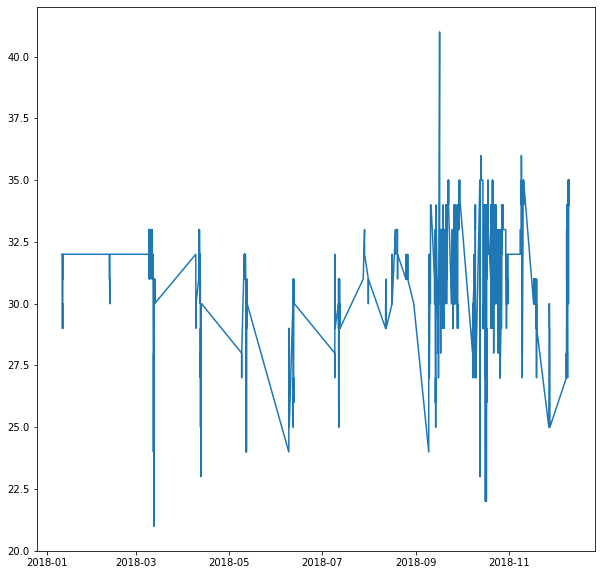

In [ ]:
# Create a time series line plot for the indoor temperature records.
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,10))
#plt.plot(np.arange(1,df_indoor.shape[0]+1),df_indoor['temp'])
plt.plot(df_indoor['noted_date'],df_indoor['temp'])
plt.show()
# pass the 'noted_date' and 'temp' columns of the indoor temperature Dataframe inside the 'plot()' function.

**Hint**: You can create a time series line plot for the indoor temperature records by passing the `noted_date` and `temp` columns of the `in_temp_df` (DataFrame for the indoor temperature records) as parameters inside the `plot()` function.

In [ ]:
# Create a DataFrame for the outdoor temperature records.
df_outdoor=df[df['out/in'] == 'Out']
df_outdoor.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Date,Day,Hours,Minutes
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out,2018,1,11,Thursday,0,7
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out,2018,1,11,Thursday,0,9
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out,2018,1,11,Thursday,0,13
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out,2018,1,11,Thursday,0,23
16213,__export__.temp_log_127981_32c85db7,Room Admin,2018-01-11 00:25:00,40,Out,2018,1,11,Thursday,0,25


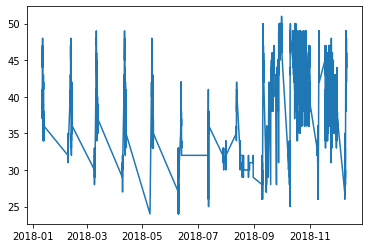

In [ ]:
# Create a time series line plot for the outdoor temperature records.
plt.plot(df_outdoor['noted_date'],df_outdoor['temp'])
plt.show()

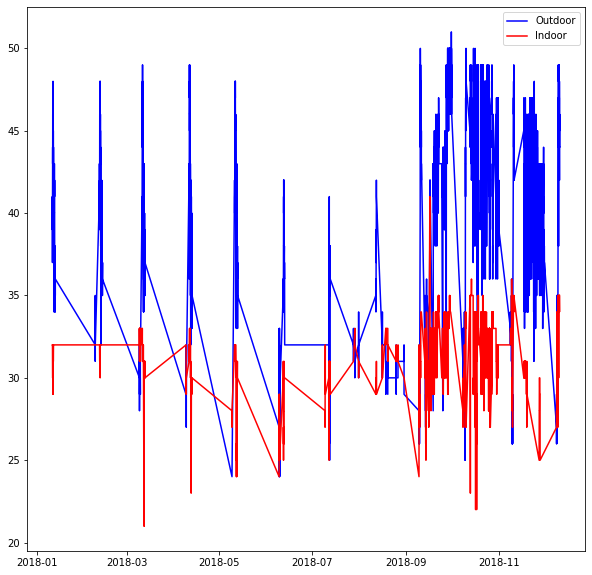

In [ ]:
# Compare the time series line plots for both the indoor and outdoor temperature records.
plt.figure(figsize=(10,10))
plt.plot(df_outdoor['noted_date'],df_outdoor['temp'],color='blue',label='Outdoor')
plt.plot(df_indoor['noted_date'],df_indoor['temp'],color='red',label='Indoor')
plt.legend()
plt.show()

**Hint**: You can compare the time-series line plots by creating both the line plots for indoor and outdoor temperature records inside a single graph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


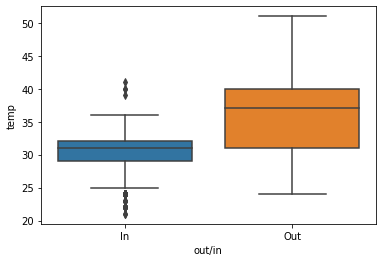

In [ ]:
# Create a box plot to represent the distribution of indoor and outdoor temperatures for the whole year.
import seaborn as sns
sns.boxplot(df['out/in'],df['temp'])
# pass the 'out/in' and 'temp' columns inside the 'x' and 'y' attributes of the 'boxplot()' function.
plt.show()

**Hint**: You can achieve the above task by passing the `out/in`  column inside `x` and `temp` column inside `y` attributes of the `boxplot()` function

---

#### 8. Grouping, Aggregation, and Bar Plots

Group the data by the indoor and outdoor temperatures. Also, get monthly mean, standard deviation, median, minimum and maximum values for both the indoor and outdoor groups.


In [ ]:
# Get the maximum and minimum temperatures for each day in each month.
df_md_temp=df.groupby(by=['Month','Date']).agg({'temp':['min','max']})
print(df_md_temp)

           temp    
            min max
Month Date         
1     11     29  48
      12     34  43
2     8      31  35
      11     30  48
      12     32  42
...         ...  ..
11    28     25  43
      29     33  43
      30     34  44
12    9      26  35
      10     30  49

[86 rows x 2 columns]


**Hints**:

- You can get the temperature for each day in each month by passing both `month` and `day` (columns) inside the `by` parameter (in square braces) of the `groupby()` function.

- You can get the maximum and minimum values from the output obtained through the `groupby()` function. To do so you can use the  aggregation function.

**Syntax**: `df.groupby(by=['month', 'day']).agg(func={'temp' : ['max', 'min']})`

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


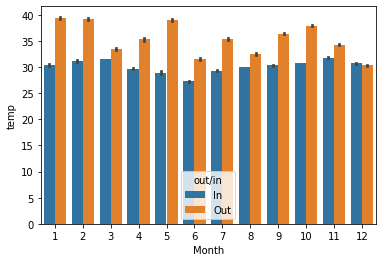

In [ ]:
# Create a bar plot for the monthly median indoor & outdoor temperatures in a single bar chart.
# Store the month names in a list i.e the labels of the x-axis
sns.barplot(df['Month'],df['temp'],hue=df['out/in'],)

# Import 'median' from the 'numpy' module

# Pass 'month', 'temp' and 'out/in' columns inside the 'x', 'y' and 'hue' parameters of the 'barplot()' function
# Set the 'estimator' attribute with 'median' value

# pass the list holding the name of months inside the 'xticks()' function
# set 'ticks=np.arrange(12)'


**Hint**: You can pass `median` inside the `estimator` attribute of the `barplot()` function to plot the monthly median and the `hue` attribute to plot both indoor and outdoor temperatures in a single bar chart.

**Q:** Which months were the hottest and coldest months?

**A:**

---

## Fun Fact

 Let's create a function to label each temperature value on a given day and time with the heat indices as advised in the data-description and get the percentage distribution of the heat zones.

Here are the heat indices as per the data-description:

 - Temperature less than or equal to 32 - Green

 - Temperature greater than 32 and less than or equal to 41 - Yellow

 - Temperature greater than 41 and less than or equal to 54 - Orange

 - Temperature greater than 54 - Red

In [ ]:
# Function to label each temperature value on a given day and time with the heat indices as advised in the data-description.
def heat_index(temp_series):
  heat_index_list = []
  for temp in temp_series:
    if temp <= 32:
      heat_index_list.append('Green')
    elif (temp > 32) and (temp <= 41):
      heat_index_list.append('Yellow')
    elif (temp > 41) and (temp <= 54):
      heat_index_list.append('Orange')
    else:
      heat_index_list.append('Red')
  return pd.Series(data=heat_index_list, index=temp_series.index)

heat_index(df['temp'])

16218     Green
16217    Yellow
16216    Yellow
16215    Yellow
16214    Yellow
          ...  
50668    Orange
50667    Orange
50666    Orange
50665    Orange
50664    Orange
Length: 97606, dtype: object

In [ ]:
# Add the 'heat_index' column in the DataFrame containing the heat indices corresponding to the temperature values on a given day and time.
df['heat_index'] = heat_index(df['temp'])
df.head()

,id,room_id/id,noted_date,temp,out/in,Year,Month,Date,Day,Hours,Minutes,heat_index
16218,__export__.temp_log_126924_cb744837,Room Admin,2018-01-11 00:06:00,32,In,2018,1,11,Thursday,0,6,Green
16217,__export__.temp_log_146101_e61c18d4,Room Admin,2018-01-11 00:07:00,40,Out,2018,1,11,Thursday,0,7,Yellow
16216,__export__.temp_log_111262_7b3ed086,Room Admin,2018-01-11 00:09:00,39,Out,2018,1,11,Thursday,0,9,Yellow
16215,__export__.temp_log_147650_344507e9,Room Admin,2018-01-11 00:13:00,40,Out,2018,1,11,Thursday,0,13,Yellow
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,2018-01-11 00:23:00,40,Out,2018,1,11,Thursday,0,23,Yellow


In [ ]:
# Counts of the heat zones.
group_heat_index = df.groupby(by=['heat_index', 'out/in'])
heat_index_agg = group_heat_index.agg(func={'temp' : ['max', 'count']})
heat_index_agg

temp       
                   max  count
heat_index out/in            
Green      In       32  16812
           Out      32  24845
Orange     Out      51  12407
Yellow     In       41   3533
           Out      41  40009

In [ ]:
heat_index_agg.columns

MultiIndex([('temp',   'max'),
            ('temp', 'count')],
           )

In [ ]:
# Percentage distribution of the heat zones.
heat_index_agg[('temp', 'percent')] = heat_index_agg[('temp', 'count')] * 100 / df.shape[0]
heat_index_agg

temp                  
                   max  count    percent
heat_index out/in                       
Green      In       32  16812  17.224351
           Out      32  24845  25.454378
Orange     Out      51  12407  12.711309
Yellow     In       41   3533   3.619655
           Out      41  40009  40.990308

Hence, we can conclude that, Yellow zone has the most number of recordings, that is, nearly 41%.

---